多元高斯函数拟合数据

1. 进行数据拟合

$$\mu = \frac{1}{m}\sum_{i=1}^mx^{(i)}$$

$$\Sigma=\frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu)(x^{(i)}-\mu)^T$$

2. 给定一个新的数据$x$，计算以下概率

$$p(x)=\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}\exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$$

其中$n$为特征的数量

3. 若$p(x)<\epsilon$，则标记为异常

In [1]:
import torch
import math
import random
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(0, 19, steps=100).unsqueeze(1)
x = torch.cat((x, x), dim=0)
y = torch.normal(x, 2)
data = torch.cat((x, y), dim=1)
print(data.shape)

torch.Size([200, 2])


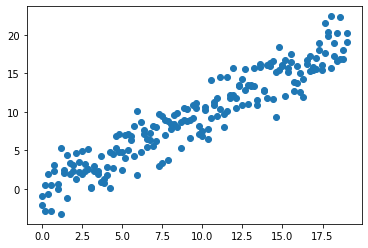

In [3]:
plt.scatter(x,y)

In [4]:
u = data.mean(dim=0)
print(u)
sigma = (data - u).transpose(0, 1).matmul(data - u) / data.shape[0]
print(sigma)

n = data.shape[1]


def probability(x):
    a = ((2 * math.pi)**n * sigma.det().abs()).rsqrt()
    b = -0.5 * (x - u).matmul(sigma.inverse()).matmul(x - u)
    return a * math.e**b

tensor([9.5000, 9.3622])
tensor([[30.6911, 31.0663],
        [31.0663, 35.3588]])


In [5]:
print(probability(torch.tensor([0, 0])))

tensor(0.0033)
